In [1170]:
import math
import numpy as np

# Questions

**과제1**: 수심 $1.0m$인 수조에서 다음의 문제를 해결하시오. 파 속도는 음해법을 이용하여 소수점 둘째자리가 변하지 않을 때까지 구하시오.

# Question #1

$kh = \pi/10$ 및 $\pi$를 만족하는 주기 $T_{1}$과 $T_{2}$를 구하시오.

## Requirements

In [1171]:
h = 1.0
g = 9.81

## Condition #1

In [1172]:
kh = math.pi/10

## Calculations #1

In [1173]:
k = kh / h

sqr_sigma = g * k * np.tanh([kh])

sigma = math.sqrt(sqr_sigma)

T1 = 2 * math.pi / sigma

In [1174]:
print("kh가 PI/10인 경우: ", T1)

kh가 PI/10인 경우:  6.489022272321439


## Condition #2

In [1175]:
kh = math.pi

## Calculations #2

In [1176]:
k = kh / h

sqr_sigma = g * k * np.tanh([kh])

sigma = math.sqrt(sqr_sigma)

T2 = 2 * math.pi / sigma

In [1177]:
print("kh가 PI인 경우: ", T2)

kh가 PI인 경우:  1.1339174776189893


# Question #2

$T_{1}$보다 긴 주기를 갖는 파 5개를 임의로 선택하여 파 속도를 구하시오.

In [1178]:
periods = np.arange(0.001, 100, 0.001)

T1보다 긴 주기를 갖는 파 5개를 임의로 생성

In [1179]:
long_T1 = [float(format(item, '.3f')) for i, item in enumerate(periods) if item > T1][:5]

In [1180]:
long_T1

[6.49, 6.491, 6.492, 6.493, 6.494]

In [1181]:
long_sigma = [2 * math.pi / i for i in long_T1]

In [1182]:
long_sqr_sigma = [i * i for i in long_sigma]

In [1183]:
print(long_sqr_sigma)

[0.9372821433082408, 0.936993371179227, 0.9367047324836179, 0.9364162271392181, 0.9361278550638967]


Eckart 식을 이용하여 초깃값 산정

In [1184]:
k_init = []

In [1185]:
for i in long_sqr_sigma:
    k_init.append(i / (g * math.sqrt(np.tanh([(i / g) * h]))))

In [1186]:
k_init

[0.3095708159665305,
 0.30952283475267234,
 0.30947486854239015,
 0.3094269173285474,
 0.3093789811040123]

Bisection Method를 활용하여 k 값 산정

In [1187]:
def f(x, sqr_sigma):
    return g * (x / sqr_sigma) * np.tanh([x*h]) - 1

In [1188]:
k = []

In [1189]:
error = 0.5 * 10**(-6)

for i, sqr_sigma in enumerate(long_sqr_sigma):
    a = -0.1 + k_init[i]
    b = 0.1 + k_init[i]
    
    while (b - a) / 2 > error:
        c = (b + a) / 2
        if f(c, sqr_sigma) == 0:
            break
        elif f(a, sqr_sigma)*f(c, sqr_sigma) > 0:
            a = c
        else:
            b = c
    c = (b + a) / 2
    
    k.append(c)

    # solution.append(f(c, sqr_sigma))
    print("k initial: ", k_init[i])
    print("k:", c)
    print("")

k initial:  0.3095708159665305
k: 0.3141106871823509

k initial:  0.30952283475267234
k: 0.31406041715013333

k initial:  0.30947486854239015
k: 0.3140101621214917

k initial:  0.3094269173285474
k: 0.31396068502874275

k initial:  0.3093789811040123
k: 0.3139104599858482



In [1190]:
abs_val = 0

In [1191]:
for i in range(0, len(k)):
    abs_val = abs(k[i] - k_init[i])

In [1192]:
str((abs_val / 5) * 100) + "%"

'0.0906295776367183%'

In [1193]:
C = []
L = []

In [1194]:
for i in range(0, len(k)):
    L.append(2 * math.pi / k[i])

In [1195]:
for i in range(0, len(k)):
    C.append(L[i] / long_T1[i])


In [1196]:
C

[3.082140687373203,
 3.082159120791374,
 3.082177559172774,
 3.0821885126361517,
 3.082206959707343]

# Question #3

$T_{2}$보다 짧은 주기를 갖는 파 5개를 임의로 선택하여 파 속도를 구하시오.

T2보다 짧은 주기를 갖는 파 5개를 임의로 생성

In [1197]:
T2

1.1339174776189893

In [1198]:
periods = np.arange(T2-0.1, T2+0.1, 0.001)

In [1199]:
short_T2 = [float(format(item, '.3f')) for i, item in enumerate(periods) if item < T2][:5]

In [1200]:
short_T2

[1.034, 1.035, 1.036, 1.037, 1.038]

In [1201]:
short_sigma = [2 * math.pi / i for i in short_T2]

In [1202]:
short_sqr_sigma = [i * i for i in short_sigma]

In [1203]:
print(short_sqr_sigma)

[36.92484315138056, 36.85352526720105, 36.78241380230377, 36.7115079608557, 36.64080695085539]


Eckart 식을 이용하여 초깃값 산정

In [1204]:
k_init = []

In [1205]:
for i in short_sqr_sigma:
    k_init.append(i / (g * math.sqrt(np.tanh([(i / g) * h]))))

In [1206]:
k_init

[3.7660251921676675,
 3.7587809715925244,
 3.751558035416577,
 3.7443563038222476,
 3.7371756973804486]

Bisection Method를 활용하여 k 값 산정

In [1207]:
def f(x, sqr_sigma):
    return g * (x / sqr_sigma) * np.tanh([x*h]) - 1

In [1208]:
k = []

In [1209]:
error = 0.5 * 10**(-6)

for i, sqr_sigma in enumerate(short_sqr_sigma):
    a = -0.1 + k_init[i]
    b = 0.1 + k_init[i]
    
    while (b - a) / 2 > error:
        c = (b + a) / 2
        if f(c, sqr_sigma) == 0:
            break
        elif f(a, sqr_sigma)*f(c, sqr_sigma) > 0:
            a = c
        else:
            b = c
    c = (b + a) / 2

    k.append(c)

    # solution.append(f(c, sqr_sigma))
    print("k initial: ", k_init[i])
    print("k:", c)
    print("")

k initial:  3.7660251921676675
k: 3.768018371488957

k initial:  3.7587809715925244
k: 3.7607993279157665

k initial:  3.751558035416577
k: 3.753601568741772

k initial:  3.7443563038222476
k: 3.746425014149396

k initial:  3.7371756973804486
k: 3.7392703476490037



In [1210]:
abs_val = 0

In [1211]:
for i in range(0, len(k)):
    abs_val = abs(k[i] - k_init[i])

In [1212]:
str((abs_val / 5) * 100) + "%"

'0.041893005371100855%'

In [1213]:
C = []
L = []

In [1214]:
for i in range(0, len(k)):
    L.append(2 * math.pi / k[i])

In [1215]:
for i in range(0, len(k)):
    C.append(L[i] / long_T1[i])


In [1216]:
C

[0.25693434422426026,
 0.2573878834782933,
 0.2578417174328627,
 0.2582958455488199,
 0.25875021449081254]

# Question #4

$T_{2} \leq T \leq T_{1}$ 구간에서 파 속도를 구하고 Eckart 및 Hunt의 식과 비교하시오.

$T_{2} \leq T \leq T_{1}$ 구간에 있는 $T$ 값 생성

In [1217]:
T = np.arange(T2, T1, 0.05)

In [1218]:
T

array([1.13391748, 1.18391748, 1.23391748, 1.28391748, 1.33391748,
       1.38391748, 1.43391748, 1.48391748, 1.53391748, 1.58391748,
       1.63391748, 1.68391748, 1.73391748, 1.78391748, 1.83391748,
       1.88391748, 1.93391748, 1.98391748, 2.03391748, 2.08391748,
       2.13391748, 2.18391748, 2.23391748, 2.28391748, 2.33391748,
       2.38391748, 2.43391748, 2.48391748, 2.53391748, 2.58391748,
       2.63391748, 2.68391748, 2.73391748, 2.78391748, 2.83391748,
       2.88391748, 2.93391748, 2.98391748, 3.03391748, 3.08391748,
       3.13391748, 3.18391748, 3.23391748, 3.28391748, 3.33391748,
       3.38391748, 3.43391748, 3.48391748, 3.53391748, 3.58391748,
       3.63391748, 3.68391748, 3.73391748, 3.78391748, 3.83391748,
       3.88391748, 3.93391748, 3.98391748, 4.03391748, 4.08391748,
       4.13391748, 4.18391748, 4.23391748, 4.28391748, 4.33391748,
       4.38391748, 4.43391748, 4.48391748, 4.53391748, 4.58391748,
       4.63391748, 4.68391748, 4.73391748, 4.78391748, 4.83391

In [1219]:
print(len(T))

108


In [1220]:
added_sqr_sigma = []

In [1221]:
for i in T:
    added_sqr_sigma.append((2*math.pi/i) ** 2)

In [1222]:
added_sqr_sigma

[30.704132959547557,
 28.165461580823116,
 25.92910373350788,
 23.948896938488993,
 22.187164885498923,
 20.612911967460796,
 19.200450566275798,
 17.928346481112623,
 16.77860094013388,
 15.73601042647599,
 14.78766147706238,
 13.922528884714662,
 13.131153804484066,
 12.405384106664547,
 11.73816359047769,
 11.123359825926766,
 10.555622740467626,
 10.030267831994628,
 9.543179226168123,
 9.090728815949122,
 8.66970850498514,
 8.277273182951891,
 7.910892533246985,
 7.5683101434971976,
 7.24750868100313,
 6.946680126395651,
 6.664200242946881,
 6.39860660645859,
 6.148579639325633,
 5.912926188311036,
 5.690565263473821,
 5.480515619220957,
 5.2818849104751715,
 5.093860199713907,
 4.9156996259215155,
 4.746725075720167,
 4.586315721231513,
 4.43390230947309,
 4.288962105035965,
 4.15101440200847,
 4.019616533079363,
 3.894360313857744,
 3.7748688690011853,
 3.660793794005476,
 3.5518126126904024,
 3.447626495690811,
 3.3479582097744665,
 3.2525502716778227,
 3.16116328347676,
 3.073

In [1223]:
print(len(added_sqr_sigma))

108


Eckart 식을 이용하여 초깃값 산정

In [1224]:
k_init = []

In [1225]:
for i in added_sqr_sigma:
    k_init.append(i / (g * math.sqrt(np.tanh([i / g * h]))))

In [1226]:
k_init

[3.135870161236885,
 2.880321502961319,
 2.6565398217280007,
 2.459843722381739,
 2.286367761003905,
 2.1328854196396634,
 1.996679080573182,
 1.8754432647772303,
 1.7672113456359493,
 1.670298876681068,
 1.5832587953844968,
 1.5048452653040891,
 1.4339839524861973,
 1.3697472286504564,
 1.3113332551910493,
 1.2580482044709902,
 1.209291072547099,
 1.1645406676354029,
 1.1233444460913928,
 1.0853089284301563,
 1.050091472001765,
 1.0173932105390635,
 0.986952997617885,
 0.958542213306537,
 0.9319603122171266,
 0.9070310075635305,
 0.8835990001407303,
 0.8615271736676672,
 0.8406941888959165,
 0.8209924184506829,
 0.802326172687414,
 0.7846101740517668,
 0.7677682436480623,
 0.7517321690682655,
 0.7364407271175379,
 0.7218388389918436,
 0.707876838806769,
 0.6945098392240203,
 0.6816971803431773,
 0.6694019500828079,
 0.6575905660206002,
 0.6462324101430793,
 0.6352995092116726,
 0.6247662545175011,
 0.6146091557014666,
 0.6048066240837825,
 0.595338781599068,
 0.5861872919873506,
 0.57

Bisection Method를 활용하여 k 값 산정

In [1227]:
def f(x, sqr_sigma):
    return g * (x / sqr_sigma) * np.tanh([x*h]) - 1

In [1228]:
print(len(added_sqr_sigma))

108


In [1229]:
k = []
eckart_k = k_init
hunt_k = []

In [1230]:
error = 0.5 * 10**(-6)

for i, sqr_sigma in enumerate(added_sqr_sigma):
    a = -0.1 + k_init[i]
    b = 0.1 + k_init[i]
    
    while (b - a) / 2 > error:
        c = (b + a) / 2
        if f(c, sqr_sigma) == 0:
            break
        elif f(a, sqr_sigma)*f(c, sqr_sigma) > 0:
            a = c
        else:
            b = c
    c = (b + a) / 2

    k.append(c)
    
    # solution.append(f(c, sqr_sigma))
    print("k initial: ", k_init[i])
    print("k:", c)
    print("")

k initial:  3.135870161236885
k: 3.141592588605049

k initial:  2.880321502961319
k: 2.8889263155833893

k initial:  2.6565398217280007
k: 2.668672466381321

k initial:  2.459843722381739
k: 2.4760329161073247

k initial:  2.286367761003905
k: 2.306975900041991

k initial:  2.1328854196396634
k: 2.158080350669937

k initial:  1.996679080573182
k: 2.026437915412049

k initial:  1.8754432647772303
k: 1.9095752685614102

k initial:  1.7672113456359493
k: 1.8053899802795041

k initial:  1.670298876681068
k: 1.712103762545326

k initial:  1.5832587953844968
k: 1.628210043553442

k initial:  1.5048452653040891
k: 1.5524378098597533

k initial:  1.4339839524861973
k: 1.4837127275106115

k initial:  1.3697472286504564
k: 1.4211254787725265

k initial:  1.3113332551910493
k: 1.3639070314361668

k initial:  1.2580482044709902
k: 1.3114039936555604

k initial:  1.209291072547099
k: 1.2630588490363568

k initial:  1.1645406676354029
k: 1.218395419222317

k initial:  1.1233444460913928
k: 1.1770054

In [1231]:
abs_val = 0

In [1232]:
for i in range(0, len(k)):
    abs_val = abs(k[i] - k_init[i])

In [1233]:
str((abs_val / len(k)) * 100) + "%"

'0.004214180840386202%'

In [1234]:
sqr_kh = []

In [1235]:
d = [0.6666666666, 0.3555555555, 0.1608465608, 0.0632098765, 0.0217540484, 0.0076507983]

In [1252]:
added_y = []

In [1253]:
for i in added_sqr_sigma:
    y = i*h/g
    added_y.append(y)
    dny = 0
    
    for j in range(0, len(d)):
        dny += d[j] * (y ** (j+1))

    sqr_kh.append((y) ** 2 + (y) / (1 + dny))

In [1237]:
sqr_kh

[9.896171744229443,
 8.37093665747254,
 7.144254178679617,
 6.149979260144069,
 5.33800251423289,
 4.6699653517441,
 4.116263713406433,
 3.6539063150211195,
 3.264948920020132,
 2.9353267957174776,
 2.6539709734538537,
 2.4121328878139088,
 2.202865607143531,
 2.0206244627311234,
 1.860959350827919,
 1.720277546651766,
 1.5956607078420981,
 1.484723453875721,
 1.385503800738959,
 1.2963779914604943,
 1.2159940215579166,
 1.1432195153199696,
 1.0771006479891498,
 1.0168295998919048,
 0.9617186281016868,
 0.9111792945641428,
 0.8647057321636183,
 0.8218610892211666,
 0.7822664891204492,
 0.7455919907981328,
 0.7115491494399948,
 0.6798848636634685,
 0.6503762622910473,
 0.6228264354186173,
 0.5970608545173526,
 0.5729243575206168,
 0.5502785993012984,
 0.5289998871971272,
 0.5089773364713559,
 0.4901112927012228,
 0.47231197775268907,
 0.45549832375345334,
 0.43959696572311113,
 0.42454136857395247,
 0.4102710683028511,
 0.39673101054522164,
 0.38387097240610035,
 0.371645055739402,
 0.3

In [1238]:
for i in sqr_kh:
    kh = math.sqrt(i)
    hunt_k.append(kh / h)

In [1239]:
C = []
Eckart_C = []
Hunt_C = []

In [1240]:
len(k)

108

In [1241]:
len(T)

108

In [1242]:
for i in range(0, len(k)):
    C.append((2 * math.pi / k[i])/T[i])

In [1243]:
for i in range(0, len(eckart_k)):
    Eckart_C.append((2 * math.pi / eckart_k[i])/T[i])

In [1244]:
for i in range(0, len(hunt_k)):
    Hunt_C.append((2 * math.pi / hunt_k[i])/T[i])

In [1245]:
C

[1.763796820179713,
 1.8370542071884741,
 1.9080883402772608,
 1.9764523282241695,
 2.0417748395517146,
 2.1037884368391855,
 2.162332159312944,
 2.21734533750306,
 2.268855538874763,
 2.3169530616246936,
 2.361779347838433,
 2.4035040168898774,
 2.4423146917433227,
 2.4784073143071392,
 2.511974986884395,
 2.5432057173953475,
 2.5722806108929674,
 2.599369431919834,
 2.6246299521165803,
 2.6482079529562803,
 2.670237226604454,
 2.690842748948277,
 2.710137417735423,
 2.7282246445160396,
 2.7451975207637136,
 2.7611422813315767,
 2.776140147352354,
 2.7902575872779734,
 2.8035635986508542,
 2.8161176638423013,
 2.82797312778069,
 2.8391810158992987,
 2.8497834835567537,
 2.859828130808509,
 2.8693475268210933,
 2.878378942814385,
 2.886957233946633,
 2.895109499565467,
 2.902864425742755,
 2.9102437853132366,
 2.9172753688470228,
 2.9239810539302953,
 2.930376730685532,
 2.93648252305324,
 2.942316660873226,
 2.947895675727917,
 2.9532309423371523,
 2.958335916162658,
 2.96323037726684

In [1246]:
Eckart_C

[1.7670154480809699,
 1.8425423123229843,
 1.916802742978994,
 1.9894601341021885,
 2.060178344226515,
 2.128639656731441,
 2.1945599150007995,
 2.257699765105261,
 2.3178716381045543,
 2.3749426583647253,
 2.42883403901998,
 2.479517727170206,
 2.527011119227015,
 2.5713706204087314,
 2.6126847114117053,
 2.6510670438755994,
 2.6866499402413058,
 2.7195785400507737,
 2.7500057230110864,
 2.778087852617711,
 2.803981322112356,
 2.827839843978235,
 2.8498124009372687,
 2.8700417662494875,
 2.888663500153954,
 2.905805334311133,
 2.921586864603886,
 2.936119482796586,
 2.949506488079513,
 2.961843329633062,
 2.97321794056686,
 2.983711131696949,
 2.993397020555494,
 3.002343476818968,
 3.0106125700873836,
 3.018261009771686,
 3.0253405698800226,
 3.0318984938636375,
 3.037977876506633,
 3.043618021223925,
 3.0488547721570987,
 3.0537208212029725,
 3.058245990635967,
 3.062457492342879,
 3.0663801649176348,
 3.0700366899959004,
 3.0734477892704155,
 3.076632403637023,
 3.0796078558938427,

In [1247]:
Hunt_C

[1.761427640977176,
 1.834304403464606,
 1.9050891510232517,
 1.973358233024401,
 2.038738472404388,
 2.100936107383368,
 2.1597531435251898,
 2.2150901932763407,
 2.2669381797369255,
 2.315362994005575,
 2.3604872865305726,
 2.402472630438813,
 2.4415040154970886,
 2.4777774986041834,
 2.5114910536498063,
 2.5428382331997366,
 2.5720040882277746,
 2.599162786734962,
 2.6244764454803877,
 2.6480947883325996,
 2.6701553414395236,
 2.6907839572518966,
 2.710095523374084,
 2.728194759627781,
 2.7451770405893776,
 2.761129204389276,
 2.7761303245239026,
 2.7902524320320206,
 2.8035611822732993,
 2.8161164649058406,
 2.827972958323571,
 2.8391806313587136,
 2.8497851958695293,
 2.8598285141821056,
 2.8693489654122084,
 2.8783817745748657,
 2.886959308171004,
 2.895111339671015,
 2.9028652880255503,
 2.9102464320434693,
 2.9172781031970785,
 2.923981859152128,
 2.9303776400776225,
 2.936483909569406,
 2.9423177818216644,
 2.9478951365009065,
 2.953230722616401,
 2.9583382525378585,
 2.963230

In [1248]:
X = np.arange(0, len(C), 1.0)

In [1249]:
X

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107.])

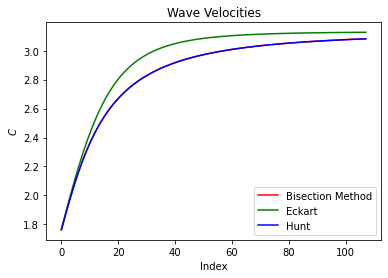

In [1250]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Using Numpy to create an array X
X = np.arange(0, len(C), 1.0)
  
# Plotting both the curves simultaneously
plt.plot(X, C, color='r', label='Bisection Method')
plt.plot(X, Eckart_C, color='g', label='Eckart')
plt.plot(X, Hunt_C, color='b', label='Hunt')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Index")
plt.ylabel("$C$")
plt.title("Wave Velocities")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

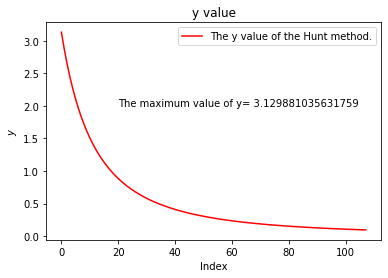

In [1276]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Using Numpy to create an array X
X = np.arange(0, len(C), 1.0)
  
# Plotting both the curves simultaneously
plt.plot(X, added_y, color='r', label='The y value of the Hunt method.')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Index")
plt.ylabel("$y$")
plt.title("y value")

ymax = max(added_y)

s = 'The maximum value of y= ' + str(ymax) + ' '

plt.annotate(s, (20, 2))
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()